Toronto Crime analysis

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

Read dataset

In [4]:
mci_df = pd.read_csv('C:/Users/Melkamu/OneDrive - University of Kwazulu-Natal/Season7/YU/Course 1/Project 1/Melkamu/Dataset/From Toronto Police acessed on Feb 02_2020/MCI_2014_to_2018.csv')
mci_df.head(2)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002


In [5]:
mci_df.shape

(167525, 29)

In [6]:
# convert dates to pandas datetime format
mci_df.occurrencedate = pd.to_datetime(mci_df.occurrencedate).dt.tz_localize(None)
mci_df.reporteddate = pd.to_datetime(mci_df.reporteddate).dt.tz_localize(None)

In [7]:
mci_df.head(2)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20 10:55:00,2014-06-20 13:20:00,Apartment,2130,210,Theft Over,...,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02 00:20:00,2014-07-02 02:58:00,Outside,1457,100,Pointing A Firearm,...,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002


In [8]:
mci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   X                    167525 non-null  float64       
 1   Y                    167525 non-null  float64       
 2   Index_               167525 non-null  int64         
 3   event_unique_id      167525 non-null  object        
 4   occurrencedate       167525 non-null  datetime64[ns]
 5   reporteddate         167525 non-null  datetime64[ns]
 6   premisetype          167525 non-null  object        
 7   ucr_code             167525 non-null  int64         
 8   ucr_ext              167525 non-null  int64         
 9   offence              167525 non-null  object        
 10  reportedyear         167525 non-null  int64         
 11  reportedmonth        167525 non-null  object        
 12  reportedday          167525 non-null  int64         
 13  reporteddayofy

In [9]:
len(mci_df)

167525

We can leave event_unique_id, division, Neighbourhood as an object, 

We may need to convert premisetype, offence, reportedmonth, reporteddayofweek, occurencemonth, occurencedayofweek, MCI to categorical columns/factors.
In case of morethan 31 we will only keep the most frequent categories of up to 31 and will may need to lable the rest to others.

In [15]:
#converting premisetype to categorical type
premisetype_cat  = list(mci_df['premisetype'].value_counts()[10:].index)
#we can latter change the grouping index based on input from the group
mci_df.loc[mci_df['premisetype'].isin(premisetype_cat) , mci_df.columns=='premisetype'] = 'OTHER'
mci_df['premisetype'] = pd.Categorical(mci_df['premisetype'])

In [16]:
#converting offence to categorical type
offence_cat  = list(mci_df['offence'].value_counts()[12:].index)
mci_df.loc[mci_df['offence'].isin(offence_cat) , mci_df.columns=='offence'] = 'OTHER'
mci_df['offence'] = pd.Categorical(mci_df['offence'])

In [17]:
#converting reportedmonth in to categorical type
mci_df['reportedmonth'] = pd.Categorical(mci_df['reportedmonth'])

In [18]:
#converting reporteddayofweek in to categorical type
mci_df['reporteddayofweek'] = pd.Categorical(mci_df['reporteddayofweek'])

In [19]:
#converting occurencemonth in to categorical type
mci_df['occurrencemonth'] = pd.Categorical(mci_df['occurrencemonth'])

In [20]:
#converting occurencedayofweek in to categorical type
mci_df['occurencedayofweek'] = pd.Categorical(mci_df['occurrencedayofweek'])

In [22]:
#converting MCI in to categorical type
MCI_cat  = list(mci_df['MCI'].value_counts()[12:].index)
mci_df.loc[mci_df['MCI'].isin(MCI_cat) , mci_df.columns=='MCI'] = 'OTHER'
mci_df['MCI'] = pd.Categorical(mci_df['MCI'])

In [23]:
mci_df.head(2)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId,occurencedayofweek
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20 10:55:00,2014-06-20 13:20:00,Apartment,2130,210,Theft Over,...,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001,Friday
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02 00:20:00,2014-07-02 02:58:00,Outside,1457,100,OTHER,...,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002,Wednesday


In [24]:
mci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   X                    167525 non-null  float64       
 1   Y                    167525 non-null  float64       
 2   Index_               167525 non-null  int64         
 3   event_unique_id      167525 non-null  object        
 4   occurrencedate       167525 non-null  datetime64[ns]
 5   reporteddate         167525 non-null  datetime64[ns]
 6   premisetype          167525 non-null  category      
 7   ucr_code             167525 non-null  int64         
 8   ucr_ext              167525 non-null  int64         
 9   offence              167525 non-null  category      
 10  reportedyear         167525 non-null  int64         
 11  reportedmonth        167525 non-null  category      
 12  reportedday          167525 non-null  int64         
 13  reporteddayofy

In [41]:
#check for duplicates
print('Duplicate values:',mci_df.duplicated().any())

Duplicate values: False


In [2]:
len(mci_df)

NameError: name 'mci_df' is not defined

In [43]:
#check for missing values
print('Missing Values')
mci_df.isnull().sum().sort_values(ascending=False)

Missing Values


occurencedayofweek     49
occurrencedayofweek    49
occurrenceyear         49
occurrencemonth        49
occurrenceday          49
occurrencedayofyear    49
offence                 0
ucr_ext                 0
ucr_code                0
reportedmonth           0
premisetype             0
reporteddate            0
occurrencedate          0
event_unique_id         0
Index_                  0
Y                       0
reportedyear            0
reporteddayofweek       0
reportedday             0
reporteddayofyear       0
ObjectId                0
reportedhour            0
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Lat                     0
Long                    0
X                       0
dtype: int64

In [31]:
# save and export the cleaned file in csv format
export_csv = mci_df.to_csv (r'C:/Users/Melkamu/OneDrive - University of Kwazulu-Natal/Season7/YU/Course 1/Project 1/Melkamu/Dataset/From Toronto Police acessed on Feb 02_2020/mci_cleaned.csv', index = None, header=True) 
#Notethat Don't forget to add '.csv' at the end of the path


Explanatory analysis

In [36]:
mci_df.index = pd.DatetimeIndex(mci_df.occurrencedate)

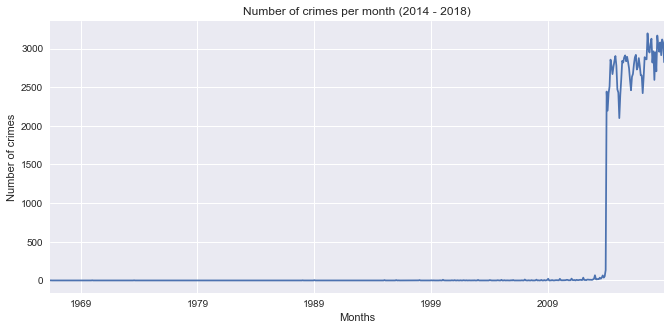

In [38]:

plt.figure(figsize=(11,5))
mci_df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2014 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()